# Trabajo Práctico Nº 3 - Intro IA

Integrantes:
- Sarina, Diego 
- Nº SIU: a1519
- Correo: sarinadiego@gmail.com

# TP3: Detector de SPAM

Uno de los problemas más comunes en la clasificación es la detección de correos electrónicos SPAM. Uno de los primeros modelos utilizados para abordar este problema fue el clasificador de Bayes ingenuo. La detección de SPAM es un problema persistente en el mundo digital, ya que los spammers continúan adaptando sus estrategias para eludir los filtros de correo no deseado. Además del clasificador de Bayes ingenuo, se han desarrollado y utilizado una variedad de técnicas más avanzadas en la detección de SPAM, que incluyen algoritmos de aprendizaje automático, redes neuronales y métodos basados en reglas.

En este trabajo práctico, utilizaremos un conjunto de datos que consta de 4601 observaciones de correos electrónicos, de los cuales 2788 son correos legítimos y 1813 son correos SPAM. Dado que el contenido de los correos electrónicos es un tipo de dato no estructurado, es necesario procesarlo de alguna manera. Para este conjunto de datos, ya se ha aplicado un procesamiento típico en el Procesamiento del Lenguaje Natural (NLP), que consiste en contar la frecuencia de palabras observadas en los correos.

El procesamiento de lenguaje natural (NLP) desempeña un papel fundamental en la detección de SPAM, ya que permite analizar el contenido de los correos electrónicos y extraer características relevantes para la clasificación. Además de contar la frecuencia de palabras, se pueden utilizar técnicas más sofisticadas, como la extracción de características semánticas y el análisis de sentimientos, para mejorar la precisión de los modelos de detección de SPAM.

En este proceso, se cuenta la cantidad de ocurrencias de cada palabra en los diferentes correos.

![spam counter](./spam.png)

Con el fin de preservar la privacidad de los mensajes, la frecuencia de palabras se encuentra normalizada. El conjunto de datos está compuesto por 54 columnas de atributos que se denominan:

- `word_freq_XXXX`: Donde `XXXX` es la palabra o símbolo. Los valores son enteros que van de 0 a 20k.

Además, hay una columna adicional llamada `spam`, que es 1 si el correo es SPAM o 0 si no lo es.

Los clasificadores de Bayes ingenuos fueron los primeros filtros utilizados por las aplicaciones de correo electrónico, basados en este principio de palabras. La idea es que, partiendo de un dato a priori sobre la probabilidad de que un correo sea SPAM o no, ciertas palabras nos indicarán que la probabilidad a posteriori, dadas esas palabras, es más probable que el correo sea SPAM o no.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Scikit-learn nos ofrece una variedad ampliada de modelos Naive Bayes, para este problema usamos MultinomialNB que es pensado para este tipo de problemas
from sklearn.naive_bayes import MultinomialNB   

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

In [6]:
# Cargamos los datos del CVS proporcionado
dataset = pd.read_csv("../enunciado/dataset/spambase.csv")
dataset.head(10)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,spam
0,0,640,640,0,320,0,0,0,0,0,...,0,0,0,0,0,0,778,0,0,1
1,210,280,500,0,140,280,210,70,0,940,...,0,0,0,0,132,0,372,180,48,1
2,60,0,710,0,1230,190,190,120,640,250,...,60,0,0,10,143,0,276,184,10,1
3,0,0,0,0,630,0,310,630,310,630,...,0,0,0,0,137,0,137,0,0,1
4,0,0,0,0,630,0,310,630,310,630,...,0,0,0,0,135,0,135,0,0,1
5,0,0,0,0,1850,0,0,1850,0,0,...,0,0,0,0,223,0,0,0,0,1
6,0,0,0,0,1920,0,0,0,0,640,...,0,0,0,0,54,0,164,54,0,1
7,0,0,0,0,1880,0,0,1880,0,0,...,0,0,0,0,206,0,0,0,0,1
8,150,0,460,0,610,0,300,0,920,760,...,0,0,0,0,271,0,181,203,22,1
9,60,120,770,0,190,320,380,0,60,0,...,0,0,0,40,30,0,244,81,0,1


## Punto Nº 1

- ¿Cuáles son las 10 palabras más encontradas en correos con SPAM y en correos No SPAM? 
- ¿Hay palabras en común?

Para obtener las palábras más usadas podemos hacer un `groupby`:

In [14]:
column_sum = dataset.groupby(by="spam", as_index=False).sum()

# Visualizo la información
column_sum.head()

,spam,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,...,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#
0,0,204860,681569,559220,2470,504739,124190,26160,107100,106080,...,1159138,800669,22840,142820,140182,442116,63242,306634,32475,60536
1,1,276190,298510,732080,298550,931799,317050,499309,377360,308320,...,226790,26700,2210,3810,37299,197563,14864,931352,316328,143003


In [18]:
# Utilizo melt para convertir las columnas de palabras en filas
melt_df = pd.melt(column_sum, id_vars="spam", var_name="word", value_name="frecuency")
melt_df.head()

,spam,word,frecuency
0,0,word_freq_make,204860
1,1,word_freq_make,276190
2,0,word_freq_address,681569
3,1,word_freq_address,298510
4,0,word_freq_all,559220


In [22]:
# Filtro los datos para SPAM y no SPAM
spam_data = melt_df[melt_df["spam"] == 1]
no_spam_data = melt_df[melt_df["spam"] == 0]

# Obtengo el top 10 de palabras mas frecuentes en SPAM y no SPAM
top_10_spam_words = spam_data.sort_values(by="frecuency", ascending=False).head(10)
top_10_non_spam_words = no_spam_data.sort_values(by="frecuency", ascending=False).head(10)

print("Top 10 palabras en correos SPAM:")
print(top_10_spam_words)

print("\nTop 10 palabras en correos no SPAM:")
print(top_10_non_spam_words)

Top 10 palabras en correos SPAM:
     spam                word  frecuency
37      1       word_freq_you    4105599
41      1      word_freq_your    2502597
23      1      word_freq_will     997100
31      1      word_freq_free     939790
9       1       word_freq_our     931799
103     1         char_freq_!     931352
5       1       word_freq_all     732080
19      1      word_freq_mail     635470
35      1     word_freq_email     578759
33      1  word_freq_business     521250

Top 10 palabras en correos no SPAM:
    spam               word  frecuency
36     0      word_freq_you    3541702
52     0   word_freq_george    3527559
48     0       word_freq_hp    2496576
22     0     word_freq_will    1495268
40     0     word_freq_your    1223098
50     0      word_freq_hpl    1204398
88     0       word_freq_re    1159138
90     0      word_freq_edu     800669
2      0  word_freq_address     681569
82     0  word_freq_meeting     604460


In [27]:
# Calculo si existen palabras repetivas entre ambas categorias
# Para esto utilizo set para luego utilizar la interseccion de ambos conjuntos
common_words = set(top_10_spam_words["word"]).intersection(set(top_10_non_spam_words["word"]))

print("Palabras repetidas entre ambas categorías:")
print(common_words)

Palabras repetidas entre ambas categorías:
{'word_freq_you', 'word_freq_will', 'word_freq_your'}


### Resumen punto Nº 1

- De acuerdo a lo que pudimos obtener, a continuación se adjuntan las 10 palabras más frecuentes en correos de tipo SPAM y NO SPAM

Top 10 palabras frecuentes en categoría SPAM

|   spam  |        word         | frequency |
|---------|---------------------|-----------|
|    1    |   word_freq_you     |  4105599  |
|    1    |  word_freq_your     |  2502597  |
|    1    |  word_freq_will     |   997100  |
|    1    |  word_freq_free     |   939790  |
|    1    |   word_freq_our     |   931799  |
|    1    |     char_freq_!     |   931352  |
|    1    |  word_freq_all      |   732080  |
|    1    |  word_freq_mail     |   635470  |
|    1    |  word_freq_email    |   578759  |
|    1    | word_freq_business  |   521250  |

Top 10 palabras frecuentes en categoría no SPAM

|   spam  |        word         | frequency |
|---------|---------------------|-----------|
|    0    |   word_freq_you     |  3541702  |
|    0    |  word_freq_george   |  3527559  |
|    0    |    word_freq_hp     |  2496576  |
|    0    |  word_freq_will     |  1495268  |
|    0    |  word_freq_your     |  1223098  |
|    0    |   word_freq_hpl     |  1204398  |
|    0    |   word_freq_re      |  1159138  |
|    0    |  word_freq_edu      |   800669  |
|    0    | word_freq_address   |   681569  |
|    0    | word_freq_meeting   |   604460  |


- En cuanto a aquellas palabras repetidas, de la intersección de ambos conjuntos podemos ver que las repetidas son las siguientes:

    - 'word_freq_you'
    - 'word_freq_will'
    - 'word_freq_your'


## Punto Nº 2

Separe el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba (70% y 30% respectivamente).

In [38]:
# Obtenemos los atributos y target
X = (dataset.drop(columns="spam") * 100).astype(int)
y = dataset["spam"]

Se separa el dataset en entrenamiento y evaluación

In [37]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.3)

# Dimensiones
print("Dimension de X_train:",X_train.shape)
print("Valores de y_train:",y_train.size)
print("Dimension de X_test:",X_test.shape)
print("Valores de y_test:",y_test.size)

Dimension de X_train: (3220, 54)
Valores de y_train: 3220
Dimension de X_test: (1381, 54)
Valores de y_test: 1381


## Punto Nº 3

Utilizando un clasificador de Bayes ingenuo, entrene con el conjunto de entrenamiento.

In [39]:
# Haremos uso del metodo MultinomialNB ofrecido por sklearn para entrenar al clasificador
# de bayes ingenuo
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train, y_train) # Entreno con los datos de entrenamiento


MultinomialNB()

In [61]:
# Hago la prediccion con el dataset de prueba
y_pred_naive_bayes = naive_bayes_classifier.predict(X_test)

## Punto Nº 4
Utilizando un clasificador de Regresión Logística, entrene con el conjunto de entrenamiento (en este caso, normalice los datos)

Escalamos para aplicar en regresión logística

In [44]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lo transformamos en DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

print("Datos escalados:")
X_train_scaled.head()

Datos escalados:


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#
0,0.000000,0.028011,0.088106,0.000000,0.048019,0.000000,0.055021,0.000000,0.000000,0.216022,...,0.000000,0.0,0.0,0.0,0.000000,0.023790,0.000000,0.003572,0.019324,0.0
1,0.018433,0.000000,0.017621,0.000000,0.000000,0.000000,0.000000,0.000000,0.150190,0.000000,...,0.000000,0.0,0.0,0.0,0.034120,0.016612,0.012007,0.000000,0.003998,0.0
2,0.006912,0.000000,0.006608,0.003037,0.007203,0.008403,0.000000,0.000000,0.060837,0.000000,...,0.000000,0.0,0.0,0.0,0.051752,0.024098,0.044352,0.000000,0.001499,0.0
3,0.029954,0.000000,0.044053,0.000000,0.064826,0.036415,0.000000,0.011701,0.076046,0.000000,...,0.002801,0.0,0.0,0.0,0.002061,0.006973,0.000000,0.000000,0.027653,0.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.145658,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.014379,0.000000,0.0


In [47]:
# Entrenamos el clasificador de Regresión Logística
logistic_regression_classifier = LogisticRegression()
logistic_regression_classifier.fit(X_train_scaled, y_train)

LogisticRegression()

In [63]:
# Hago la prediccion con el dataset de prueba
y_pred_logistic_regression = logistic_regression_classifier.predict(X_test_scaled)

## Punto Nº 5

- Calcule la matriz de confusión del conjunto de evaluación para ambos modelos. 
- ¿Qué tipo de error comete más cada modelo?
- ¿Cuál de los dos tipos de error crees que es más importante para este problema?

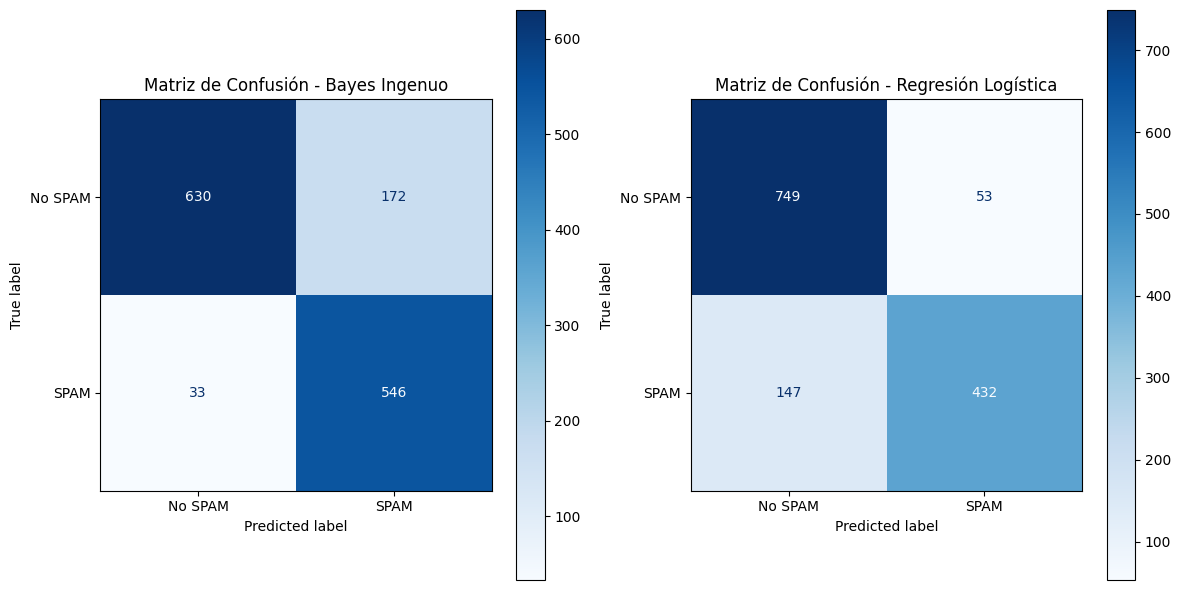

In [72]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Calcular la matriz de confusión y plotear para el clasificador de Bayes ingenuo
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Matriz de confusion - clasificador de bayes ingenuo
confusion_matrix_nb = confusion_matrix(y_test, y_pred_naive_bayes) # intercambie los argumentos
disp_nb = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_nb, display_labels=["No SPAM", "SPAM"])
disp_nb.plot(ax=axes[0], cmap='Blues')
axes[0].set_title("Matriz de Confusión - Bayes Ingenuo")

# Matriz de confusion - clasificador de Regresión Logística
confusion_matrix_lr = confusion_matrix(y_test, y_pred_logistic_regression)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_lr, display_labels=["No SPAM", "SPAM"])
disp_lr.plot(ax=axes[1], cmap='Blues')
axes[1].set_title("Matriz de Confusión - Regresión Logística")
plt.tight_layout()
plt.show()

### Resumen punto Nº 5

1. *¿Qué tipo de error comete más cada modelo?*:

    Para responder esta pregunta necesitamos interpretar las matrices de confusión obtenidas anteriormente.
    Considerando que las mismas tienen la siguiente representación (en ambos casos)
    

    |               | Predicted No SPAM | Predicted SPAM |
    |---------------|-------------------|----------------|
    | True No SPAM  |       TN          |       FP       |
    | True SPAM     |       FN          |       TP       |

    Donde:
    - TN (True Negative): Correos no SPAM correctamente clasificados como no SPAM.
    - FP (False Positive): Correos no SPAM incorrectamente clasificados como SPAM.
    - FN (False Negative): Correos SPAM incorrectamente clasificados como no SPAM.
    - TP (True Positive): Correos SPAM correctamente clasificados como SPAM.

    Con esto dicho y a raiz de lo observado, podemos decir que:

    - Clasificador de Bayes Ingenuo: comete un error significativamente mas grande de TIPO 1 (False Positives)
    - Clasificador de regresion logistica: comete mas error de TIPO 2 (False Negatives)

2. *¿Cuál de los dos tipos de error crees que es más importante para este problema?*:

    En este tipo de problema considero que es mas importante el error de TIPO 1 (Falso Positivo), es decir, quiero que este error sea bajo. El motivo principal es que los falsos positivos en este contexto, implican clasificar incorrectamente un correo legítimo como SPAM, haciendo que el usuario pueda perder correos importantes o relevantes.

    Por otro lado, aunque los falsos negativos (errores de tipo 2) implican que un correo SPAM llegue a la bandeja del usuario, esto generalmente tiene menos consecuencias (o menos impacto negativo) dado que el usuario puede identificar el correo. En cambio si el email es legítimo y nunca llega a la bandeja principal, el impacto es alto.


## Punto Nº 6

Calcule la precisión y la recuperación de ambos modelos. Para cada métrica: 

- ¿Cuál es el mejor modelo? 
- ¿Cómo se relacionan estas métricas con los tipos de errores analizados en el punto anterior? 

Expanda su respuesta.

In [75]:
# Calculo la precisión y la recuperación para el clasificador de Bayes ingenuo
precision_nb = precision_score(y_test, y_pred_naive_bayes)
recall_nb = recall_score(y_test, y_pred_naive_bayes)

# Calculo la precisión y la recuperación para el clasificador de Regresión Logística
precision_lr = precision_score(y_test, y_pred_logistic_regression)
recall_lr = recall_score(y_test, y_pred_logistic_regression)

print("Precisión del clasificador de Bayes ingenuo:", precision_nb)
print("Recuperación del clasificador de Bayes ingenuo:", recall_nb)

print("Precisión del clasificador de Regresión Logística:", precision_lr)
print("Recuperación del clasificador de Regresión Logística:", recall_lr)

Precisión del clasificador de Bayes ingenuo: 0.7604456824512534
Recuperación del clasificador de Bayes ingenuo: 0.9430051813471503
Precisión del clasificador de Regresión Logística: 0.8907216494845361
Recuperación del clasificador de Regresión Logística: 0.7461139896373057


### Resumen punto Nº 6

- ¿Cuál es el mejor modelo?:

    Si bien la elección de los modelos depende del contexto particular del problema y además debemos tener en cuenta tanto la precisión como la recuperación. En este contexto de los clasificadores de Spam, necesitamos enfocarnos en la *precisión*, por ende buscamos minimizar la cantidad de correos legítimos (no spam) clasificados incorrectamente como Spam (buscamos reducir él los falsos positivos).

    Aclarado lo del párrafo anterior, y buscando el modelo con mayor precisión entonces tenemos que el modelo de Regresión Logística sería preferible en este caso.

- ¿Cómo se relacionan estas métricas con los tipos de errores analizados en el punto anterior?

    Las métricas de precisión y recuperación están relacionadas con los tipos de errores de la siguiente manera:
    
    -  La precisión está relacionada con los falsos positivos (error tipo 1). Una precisión más alta indica que el modelo comete menos errores de tipo 1, es decir, clasifica menos correos legítimos como SPAM. En este caso, la regresión logística tiene una precisión más alta, lo que significa que comete menos errores de clasificación al etiquetar los correos como SPAM.
    
    - La recuperación está relacionada con los falsos negativos (error tipo 2). Una recuperación más alta indica que el modelo comete menos errores de tipo 2, es decir, pasa por alto menos correos SPAM. En este caso, el modelo de Bayes ingenuo tiene una recuperación más alta, lo que significa que identifica más correos SPAM correctamente.


## Punto Nº 7

Obtenga la curva ROC y el AUC (Área Bajo la Curva ROC) de ambos modelos.

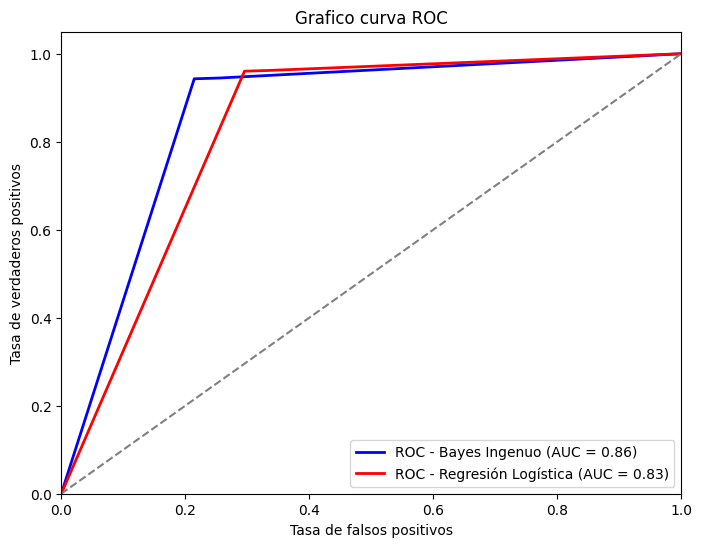

In [90]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Obtengo las probabilidades predichas para ambos modelos
y_pred_proba_naive_bayes = naive_bayes_classifier.predict_proba(X_test)[:, 1]
y_pred_proba_logistic_regression = logistic_regression_classifier.predict_proba(X_test)[:, 1]

# Calculo la curva ROC y el AUC para el clasificador de Bayes ingenuo
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_proba_naive_bayes)
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Calculo la curva ROC y el AUC para el clasificador de Regresión Logística
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_logistic_regression)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Grafico las curvas ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, color='blue', lw=2, label='ROC - Bayes Ingenuo (AUC = %0.2f)' % roc_auc_nb)
plt.plot(fpr_lr, tpr_lr, color='red', lw=2, label='ROC - Regresión Logística (AUC = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Grafico curva ROC')
plt.legend(loc="lower right")
plt.show()


In [89]:
print("Valores AUC para los modelos:")
print("  - Bayes Ingenuo: ",roc_auc_nb)
print("  - Regresión Logística: ",roc_auc_lr)

Valores AUC para los modelos:
  - Bayes Ingenuo:  0.8638119726590261
  - Regresión Logística:  0.8321984331054918
